In [1]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os
import seaborn as sns

In [2]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files[0:5]

['0-Mn-fw-EM-28-r1.seq',
 '0-Mn-fw-EM-28.seq',
 '0-Mn-fw-r2-EM-28.seq',
 '0-Mn-fw-r4-EM-28.seq',
 '0-Mn-re-EM-27.seq']

In [3]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['0-Mn-fw-EM-28.ab1',
 '0-Mn-re-EM-27.ab1',
 '15-Mn-fw-EM-28.ab1',
 '15-Mn-re-EM-27.ab1',
 '20-Mn-Fw-EM-28.ab1',
 '20-Mn-re-EM-27.ab1',
 '25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '30-Mn-fw-EM-28.ab1',
 '30-Mn-re-EM-27.ab1',
 '35-Mn-fw-EM-28.ab1',
 '35-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1']

In [4]:
sequences = []
traces = []
for f in seq_files:
    seq = SeqIO.read(f, 'fasta')
    seq.id = f
    seq.name = f
    seq.description = f
    sequences.append(seq)
    
sequences

[SeqRecord(seq=Seq('NNNNNNNNNNNNGAAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGA...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28-r1.seq', name='0-Mn-fw-EM-28-r1.seq', description='0-Mn-fw-EM-28-r1.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28.seq', name='0-Mn-fw-EM-28.seq', description='0-Mn-fw-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNNGNNNNNNNNNNNNNNNNNNNNGNNNNNNNNNNNNNNNNAN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-r2-EM-28.seq', name='0-Mn-fw-r2-EM-28.seq', description='0-Mn-fw-r2-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNANNNACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...NNG', SingleLetterAlphabet()), id='0-Mn-fw-r4-EM-28.seq', name='0-Mn-fw-r4-EM-28.seq', description='0-Mn-fw-r4-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', SingleLetterAlphabet()), id='0-Mn-re-EM-27.seq', name='0-Mn-re-EM-27.seq',

In [5]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [6]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')
# fw_sequences

30

In [7]:
re_sequences = [s for s in sequences if '-re' in s.id or '-Re-' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

7

In [8]:
# from Bio.Align.Applications import ClustalOmegaCommandline

# cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
# cline()

In [9]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 33 rows and 929 columns
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-r2-EM-28.seq
TGA-GTCGGTTTTGGTCCNACCTATCAANGGATCATCACAAATT...--- 0-Mn-fw-r3-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-r4-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-r2-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-r3-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-r4-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 15-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 20-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 20-Mn-fw-r2-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 20-Mn-fw-r3-EM-28.seq


In [10]:
from Levenshtein import distance

In [11]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

389
391
390


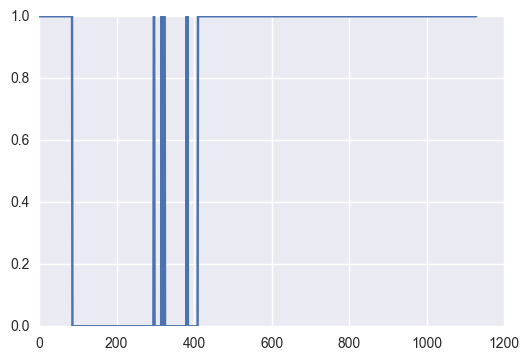

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
window_length = 5
for pos in range(aln.get_alignment_length()):
    temp_aln = aln[:, pos:pos+window_length]
    letters = Counter()
    for i in range(temp_aln.get_alignment_length()):
        letters = letters + Counter(temp_aln[:, i])
    # letters = Counter(aln[:, pos:pos+10])
    
    
    # b = bool(int(letters['-']/window_length))
    b = bool(int((letters['-'] + letters['N'])/window_length))
    num_gaps.append(b)
plt.plot(num_gaps)
# plt.ylim(-1, 3)

In [13]:
# identify the longest sequence of zeros amongst smoothed out data.
from itertools import groupby

def find_midpoint_of_longest_zeros(num_gaps):
    idx_longest_zeros = 0
    longest_zeros = [0]
    pos_counter = 0
    for i, (elm, grp) in enumerate(groupby(num_gaps)):
        grp = list(grp)
        if not elm and len(grp) > len(longest_zeros):
            longest_zeros = grp
            idx_longest_zeros = pos_counter
        pos_counter += len(grp)
    
    return int((idx_longest_zeros + len(longest_zeros)) / 2)

find_midpoint_of_longest_zeros(num_gaps)

148

In [14]:
midpt = find_midpoint_of_longest_zeros(num_gaps)

In [15]:
import pymc3 as pm
import numpy as np

In [16]:
positions = np.arange(0, len(num_gaps))
with pm.Model() as model:
    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=0, upper=midpt)
    switchpoint2 = pm.DiscreteUniform('switchpoint2', lower=midpt, upper=len(num_gaps))
    
    p = pm.Uniform('p', lower=0, upper=1, shape=4)

    rate1 = pm.math.switch(positions < switchpoint1, p[0], p[1])
    rate2 = pm.math.switch(positions > switchpoint2, p[2], p[3])
    
    mutations1 = pm.Bernoulli('mutations1', p=rate1, observed=num_gaps)
    mutations2 = pm.Bernoulli('mutations2', p=rate2, observed=num_gaps)

Applied interval-transform to p and added transformed p_interval_ to model.


In [17]:
with model:
    step1 = pm.NUTS([p])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint1, switchpoint2])
    start = pm.find_MAP()
    trace = pm.sample(5000, start=start, step=[step1, step2])

100%|██████████| 5000/5000 [00:21<00:00, 233.96it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119efc6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a0d5d30>]], dtype=object)

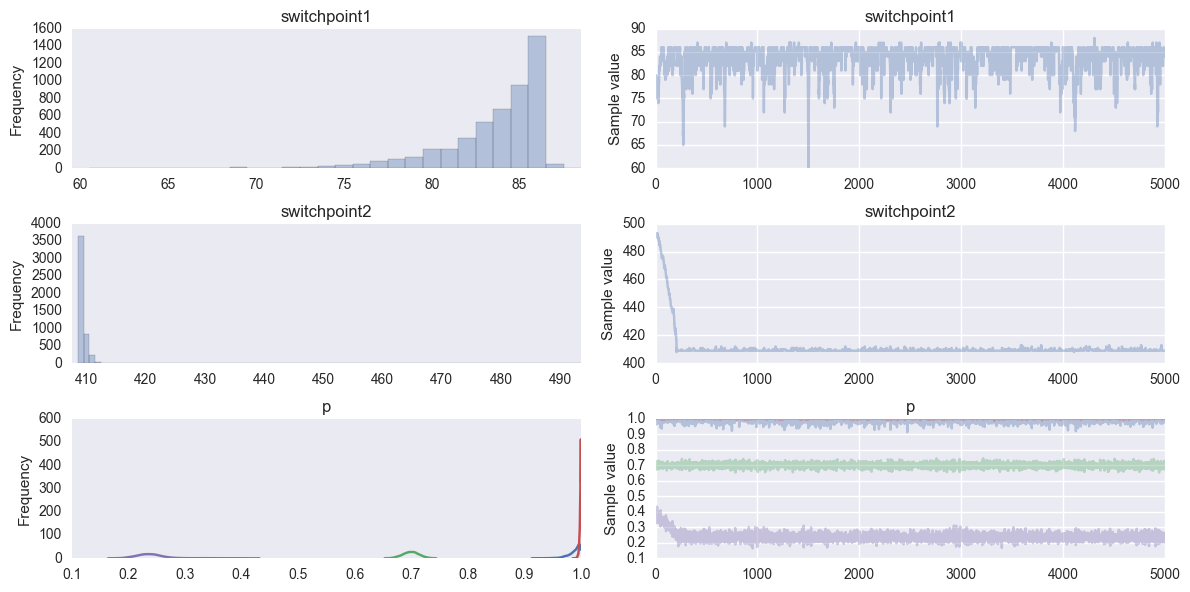

In [18]:
pm.traceplot(trace)

In [19]:
burnin = 1000
start = int(np.percentile(trace['switchpoint1'][burnin:], 97.5, axis=0))
start

86

In [20]:
end = int(np.percentile(trace['switchpoint2'][burnin:], 2.5, axis=0))
end

409

In [40]:
aln_trimmed = aln[:, start:end]
concs = []
muts = []
for i in range(len(aln_trimmed) - 1):
    dist = distance(str(aln_trimmed[i].seq), str(aln_trimmed[-1].seq))
    print(aln_trimmed[i].id, dist)
    
    concs.append(str(int(aln_trimmed[i].id.split('-')[0])/100))
    muts.append(dist)

0-Mn-fw-EM-28-r1.seq 0
0-Mn-fw-EM-28.seq 0
0-Mn-fw-r2-EM-28.seq 6
0-Mn-fw-r3-EM-28.seq 104
0-Mn-fw-r4-EM-28.seq 0
10-Mn-fw-EM-28-r1.seq 0
10-Mn-fw-r2-EM-28.seq 0
10-Mn-fw-r3-EM-28.seq 0
10-Mn-fw-r4-EM-28.seq 0
15-Mn-fw-EM-28.seq 7
20-Mn-fw-EM-28-r1.seq 1
20-Mn-fw-r2-EM-28.seq 0
20-Mn-fw-r3-EM-28.seq 3
20-Mn-fw-r4-EM-28.seq 1
25-Mn-fw-EM-28-r1.seq 1
25-Mn-fw-EM-28.seq 21
30-Mn-fw-EM-28-r1.seq 3
30-Mn-fw-EM-28.seq 34
30-Mn-fw-r2-EM-28.seq 1
30-Mn-fw-r3-EM-28.seq 6
30-Mn-fw-r4-EM-28.seq 47
35-Mn-fw-EM-28-r1.seq 1
35-Mn-fw-EM-28.seq 5
40-Mn-fw-EM-28-r1.seq 1
40-Mn-fw-r2-EM-28.seq 1
40-Mn-fw-r3-EM-28.seq 4
40-Mn-fw-r4-EM-28.seq 0
50-Mn-fw-EM-28-r1.seq 4
50-Mn-fw-r2-EM-28.seq 1
50-Mn-fw-r3-EM-28.seq 53
50-Mn-fw-r4-EM-28.seq 5
55-Mn-fw-EM-28.seq 12


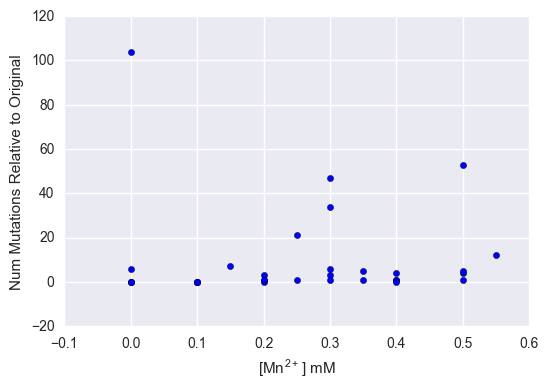

In [41]:
plt.scatter(x=concs, y=muts)
# plt.plot(concs, muts)
plt.ylabel('Num Mutations Relative to Original')
plt.xlabel('$\mathregular{[Mn^{2+}]}$ mM')

In [42]:
sorted_concs = sorted(list(set(concs)))
concs_idx = dict()
for i, c in enumerate(sorted_concs):
    concs_idx[c] = i
    
indices = []
for c in concs:
    indices.append(concs_idx[c])
indices

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9]

In [43]:
with pm.Model() as model_mut:
    # upper = pm.Exponential('upper', lam=0.05)
    num_mutations = pm.Uniform('num_mutations', 0, 50, shape=len(sorted_concs))
    variance = pm.HalfCauchy('variance', beta=1, shape=len(sorted_concs))
    deg_f = pm.Exponential('degrees_freedom_minus_one', lam=1/30) + 1
    
    mu = num_mutations[indices]
    sig = variance[indices]
    # nu = deg_f[indices]
    
    # like = pm.Cauchy('like', alpha=mu, beta=sig, observed=muts)
    like = pm.StudentT('like', mu=mu, sd=sig**-2, nu=deg_f, observed=muts)

Applied interval-transform to num_mutations and added transformed num_mutations_interval_ to model.
Applied log-transform to variance and added transformed variance_log_ to model.
Applied log-transform to degrees_freedom_minus_one and added transformed degrees_freedom_minus_one_log_ to model.


In [44]:
with model_mut:
    params_mut = pm.variational.advi(n=200000)
    trace_mut = pm.variational.sample_vp(params_mut, draws=10000,)

Iteration 0 [0%]: ELBO = -979.67
Iteration 20000 [10%]: Average ELBO = -287.56
Iteration 40000 [20%]: Average ELBO = -135.81
Iteration 60000 [30%]: Average ELBO = -125.4
Iteration 80000 [40%]: Average ELBO = -116.47
Iteration 100000 [50%]: Average ELBO = -107.72
Iteration 120000 [60%]: Average ELBO = -98.9
Iteration 140000 [70%]: Average ELBO = -90.1
Iteration 160000 [80%]: Average ELBO = -81.26
Iteration 180000 [90%]: Average ELBO = -72.4
Finished [100%]: Average ELBO = -63.68


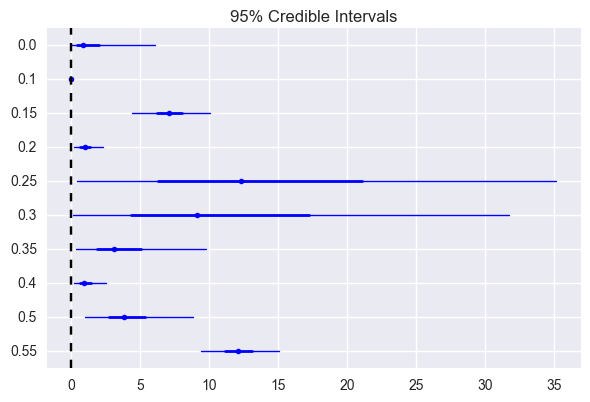

In [45]:
pm.forestplot(trace_mut, varnames=['num_mutations'], ylabels=sorted(set([str(i) for i in concs])))

[]

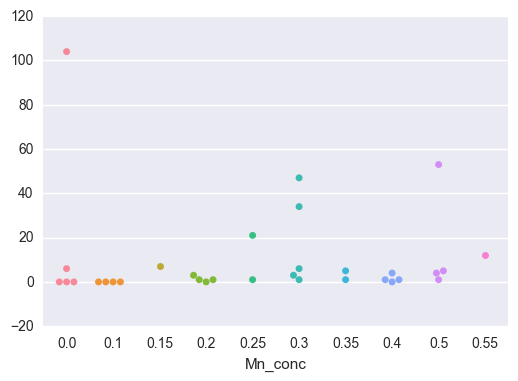

In [46]:
import pandas as pd
df = pd.DataFrame()
df['Mn_conc'] = concs
df['Mn_conc'] = df['Mn_conc'].astype(str)
df['muts'] = muts

df.to_csv('mutations_vs_conc.csv')

sns.swarmplot(data=df, x='Mn_conc', y=muts)
plt.plot()

In [47]:
df

,Mn_conc,muts
0,0.0,0
1,0.0,0
2,0.0,6
3,0.0,104
4,0.0,0
5,0.1,0
6,0.1,0
7,0.1,0
8,0.1,0
9,0.15,7
